<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Изменение-размеров-выборок" data-toc-modified-id="Изменение-размеров-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение размеров выборок</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

**Цели и задачи:**

- Проанализировать исторические данные о поведении клиентов банка, расторжении договоров. Спрогнозировать уход клиента из банка.
- Построить модель классификации, метрика качества f1 (минимальное значение 0.59)
- Измерить AUC-ROC, сравнить её значение с f1-мерой.

**План выполнения работы:**

- 1. Подготовка данных
     - 1.1 Загрузка данных
     - 1.2 Подготовка признаков
     - 1.3 Преобразование признака `Tenure`
- 1. Исследование задачи
     - 2.1 Решающее дерево
     - 2.2 Случайный лес
     - 2.3 Логистическая регрессия
- 1. Борьба с дисбалансом
     - 3.1 Взвешивание классов
     - 3.2 Upsampling и Downsampling
- 1. Тестирование модели
- 1. Общий вывод

**Описание данных:**
Исторические данные о поведении клиентов и расторжении договоров с банком.
Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Признаки**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — количество недвижимости у клиента
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**

- `Exited` — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<b>Просмотр информации из файла</b>

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<i>
В данных есть пропущенные значения в столбце Tenure, также имеются категориальные признаки в столбцах Geography, Gender. 
Для корректной работы модели логистической регрессии, заменим пропущенные значения медианными, а категориальные признаки обработаем техникой прямого кодирования. <br>    
Столбцы Surname, RowNumber и CustomerId содержат информацию, которая не пригодится для обучения модели, поэтому удалим их.
</i>

<b>Обработка пропущенных значений</b>

In [5]:
median = df['Tenure'].median()
df.loc[(df['Tenure'].isna()), 'Tenure'] = median

<b>Удаление ненужных столбцов</b>

In [6]:
drop_columns = ['RowNumber','CustomerId', 'Surname']
df = df.drop(drop_columns, axis=1)

<b>Проверка наличия дубликатов</b>

In [7]:
df.duplicated().sum()

0

<b>Прямое кодирование категориальных признаков с учетом дамми-ловушки</b>

In [8]:
df_ohe = pd.get_dummies(df, drop_first=True)

<b>Разделение данных на выборки</b>

In [9]:
df_train, df_valid = train_test_split(df_ohe, test_size=0.25, random_state=12345)
df_valid, df_test = train_test_split(df_valid, test_size = 0.5, random_state=12345)

In [10]:
df_train.shape, df_valid.shape, df_test.shape

((7500, 12), (1250, 12), (1250, 12))

<b>Объявление переменных</b>

In [11]:
features_train = df_train.drop('Exited', axis=1)
features_valid = df_valid.drop('Exited', axis=1)
features_test = df_test.drop('Exited', axis=1)

target_train = df_train['Exited']
target_valid = df_valid['Exited']
target_test = df_test['Exited']

<b>Масштабтрование признаков</b>

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [13]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

<b>Модель: Решающее дерево</b>

In [14]:
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train).score(features_valid, target_valid)

0.7864

<b>Модель: Случайный лес</b>

In [15]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_forest.fit(features_train, target_train).score(features_valid, target_valid)

0.8632

<b>Модель: Логистическая регрессия</b>

In [16]:
model_logic = LogisticRegression(solver = 'liblinear')
model_logic.fit(features_train, target_train).score(features_valid, target_valid)

0.7992

<i>Наибольшую точность показала модель Случайного леса.</i>

<b>Матрица ошибок</b>

In [17]:
predicted_valid_tree = model_tree.predict(features_valid)
print('Матрица ошибок модели Дерево решений:')
confusion_matrix(target_valid, predicted_valid_tree)

Матрица ошибок модели Дерево решений:


array([[850, 137],
       [130, 133]])

In [18]:
predicted_valid_forest = model_forest.predict(features_valid)
print('Матрица ошибок модели Случайный лес:')
confusion_matrix(target_valid, predicted_valid_forest)

Матрица ошибок модели Случайный лес:


array([[954,  33],
       [138, 125]])

In [19]:
predicted_valid_logic = model_logic.predict(features_valid)
print('Матрица ошибок модели Логистическая регрессия:')
confusion_matrix(target_valid, predicted_valid_logic)

Матрица ошибок модели Логистическая регрессия:


array([[945,  42],
       [209,  54]])

<i>Модели довольно часто предсказывают ложноотрицательные и ложноположительные ответы. Наиболее "пессимистична" модель Логистической регрессии.</i>

<b>Исследование метрик качества моделей на несбалансированной выборке</b>

<i>Дерево решений</i>

In [20]:
print('Полнота: ', recall_score(target_valid, predicted_valid_tree))
print('Точность: ', precision_score(target_valid, predicted_valid_tree))
print('F1-мера: ', f1_score(target_valid, predicted_valid_tree))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_tree))

Полнота:  0.5057034220532319
Точность:  0.4925925925925926
F1-мера:  0.49906191369606
AUC-ROC:  0.683449482049919


<i>Случайный лес</i>

In [21]:
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность: ', precision_score(target_valid, predicted_valid_forest))
print('F1-мера: ', f1_score(target_valid, predicted_valid_forest))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_forest))

Полнота:  0.4752851711026616
Точность:  0.7911392405063291
F1-мера:  0.5938242280285037
AUC-ROC:  0.7209252603233672


<i>Логистическая регрессия</i>

In [22]:
print('Полнота: ', recall_score(target_valid, predicted_valid_logic))
print('Точность: ', precision_score(target_valid, predicted_valid_logic))
print('F1-мера: ', f1_score(target_valid, predicted_valid_logic))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_logic))

Полнота:  0.20532319391634982
Точность:  0.5625
F1-мера:  0.3008356545961003
AUC-ROC:  0.5813850012134941


<i>Наилучшие метрики у модели Случайного леса.</i>

<b>Изучение баланса классов</b>

In [23]:
target_train.value_counts(normalize = True)

0    0.799733
1    0.200267
Name: Exited, dtype: float64

In [24]:
target_valid.value_counts(normalize = True)

0    0.7896
1    0.2104
Name: Exited, dtype: float64

<i>Наблюдается дисбаланс классов обучающей и валидационной выборок: ответ "0" составляет порядка 80%, ответ "1" - 20%.</i>

## Борьба с дисбалансом

### Взвешивание классов

In [25]:
model_tree_balanced = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_tree_balanced.fit(features_train, target_train)
predicted_valid_tree_balanced = model_tree_balanced.predict(features_valid)
print("Значение F1-меры для сбалансированной модели Дерево решений:", f1_score(target_valid, predicted_valid_tree_balanced))

Значение F1-меры для сбалансированной модели Дерево решений: 0.5057034220532319


In [26]:
model_forest_balanced = RandomForestClassifier(random_state=12345, n_estimators = 100, class_weight='balanced')
model_forest_balanced.fit(features_train, target_train)
predicted_valid_forest_balanced = model_forest_balanced.predict(features_valid)
print("Значение F1-меры для сбалансированной модели Случайный лес:", f1_score(target_valid, predicted_valid_forest_balanced))

Значение F1-меры для сбалансированной модели Случайный лес: 0.5956416464891041


In [27]:
model_logic_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_logic_balanced.fit(features_train, target_train)
predicted_valid_logic_balanced = model_logic_balanced.predict(features_valid)
print("Значение F1-меры для сбалансированной модели Логистической регрессии:", f1_score(target_valid, predicted_valid_logic_balanced))

Значение F1-меры для сбалансированной модели Логистической регрессии: 0.5112582781456954


<i>Значение F1-меры для всех моделей увеличилось. </i>

### Изменение размеров выборок

<b>Разделение обучающей выборки на отрицательные и положительные объекты</b>

In [28]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

<b>Увеличение выборки в 4 раза</b>

In [29]:
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

<i>Перемешивание данных</i>

In [30]:
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [31]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(12006, 11)
(12006,)


<i>Обучение моделей на новых данных</i>

In [32]:
model_tree_up = DecisionTreeClassifier(random_state=12345)
model_tree_up.fit(features_upsampled, target_upsampled)
predicted_valid_tree = model_tree_up.predict(features_valid)

In [33]:
model_forest_up = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_forest_up.fit(features_upsampled, target_upsampled)
predicted_valid_forest = model_forest_up.predict(features_valid)

In [34]:
model_logic_up = LogisticRegression(random_state=12345, solver='liblinear')
model_logic_up.fit(features_upsampled, target_upsampled)
predicted_valid_logic = model_logic_up.predict(features_valid)

<i>Изучение метрик классификации новых моделей</i>

<b><i>Решающее дерево</i></b>

In [35]:
print('Полнота: ', recall_score(target_valid, predicted_valid_tree))
print('Точность: ', precision_score(target_valid, predicted_valid_tree))
print('F1-мера: ', f1_score(target_valid, predicted_valid_tree))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_tree))

Полнота:  0.4752851711026616
Точность:  0.48638132295719844
F1-мера:  0.4807692307692307
AUC-ROC:  0.6707732846394766


<b><i>Случайный лес</i></b>

In [36]:
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность: ', precision_score(target_valid, predicted_valid_forest))
print('F1-мера: ', f1_score(target_valid, predicted_valid_forest))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_forest))

Полнота:  0.5703422053231939
Точность:  0.7142857142857143
F1-мера:  0.6342494714587739
AUC-ROC:  0.7547759658834815


<b><i>Логистическая регрессия</i></b>

In [37]:
print('Полнота: ', recall_score(target_valid, predicted_valid_logic))
print('Точность: ', precision_score(target_valid, predicted_valid_logic))
print('F1-мера: ', f1_score(target_valid, predicted_valid_logic))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_logic))

Полнота:  0.7338403041825095
Точность:  0.39148073022312374
F1-мера:  0.5105820105820106
AUC-ROC:  0.7149444682006774


<i>Метрики качества для всех моделей улучшились, для модели Случайного леса F1-мера стала равной порядка 0,63.</i>

<b>Уменьшение выборки</b>

<i>Исключение случайных элементов из отрицательных объектов</i>

In [38]:
features_zeros = features_zeros.sample(frac=0.1, random_state=12345)
target_zeros = target_zeros.sample(frac=0.1, random_state=12345)

<i>Создание новой обучающей выборки</i>

In [39]:
features_downsampled = pd.concat([features_zeros] + [features_ones])
target_downsampled = pd.concat([target_zeros] + [target_ones])

<i>Перемешивание данных</i>

In [40]:
features_downsampled, target_downsampled = shuffle(
features_downsampled, target_downsampled, random_state=12345)
print(features_downsampled.shape)
print(target_downsampled.shape)

(2102, 11)
(2102,)


<i>Обучение моделей на новых данных</i>

In [41]:
model_tree_down = DecisionTreeClassifier(random_state=12345)
model_tree_down.fit(features_downsampled, target_downsampled)
predicted_valid_tree_down = model_tree_down.predict(features_valid)

In [42]:
model_forest_down = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_forest_down.fit(features_downsampled, target_downsampled)
predicted_valid_forest_down = model_forest_down.predict(features_valid)

In [43]:
model_logic_down = LogisticRegression(random_state=12345, solver='liblinear')
model_logic_down.fit(features_downsampled, target_downsampled)
predicted_valid_logic_down = model_logic_down.predict(features_valid)

<i>Изучение метрик классификации новых моделей</i>

<b><i>Решающее дерево</i></b>

In [44]:
print('Полнота: ', recall_score(target_valid, predicted_valid_tree_down))
print('Точность: ', precision_score(target_valid, predicted_valid_forest_down))
print('F1-мера: ', f1_score(target_valid, predicted_valid_logic_down))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_tree_down))

Полнота:  0.8022813688212928
Точность:  0.33798882681564246
F1-мера:  0.4183583406884378
AUC-ROC:  0.6752035010266544


<b><i>Случайный лес</i></b>

In [45]:
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность: ', precision_score(target_valid, predicted_valid_forest))
print('F1-мера: ', f1_score(target_valid, predicted_valid_forest))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_forest_down))

Полнота:  0.5703422053231939
Точность:  0.7142857142857143
F1-мера:  0.6342494714587739
AUC-ROC:  0.719954465080264


<b><i>Логистическая регрессия</i></b>

In [46]:
print('Полнота: ', recall_score(target_valid, predicted_valid_logic))
print('Точность: ', precision_score(target_valid, predicted_valid_logic))
print('F1-мера: ', f1_score(target_valid, predicted_valid_logic))
print('AUC-ROC: ', roc_auc_score(target_valid, predicted_valid_logic_down))

Полнота:  0.7338403041825095
Точность:  0.39148073022312374
F1-мера:  0.5105820105820106
AUC-ROC:  0.6299016491962046


<i>При уменьшении выборки качество модели Дерево решений снизилось, а качество моделей Случайного леса и Логистической регрессии увеличилось.</i>

## Тестирование модели

<i>Для тестирования возьмем модель Случайного леса, обученную на увеличенной выборке</i>

In [47]:
predictions_test = model_forest_up.predict(features_test)

In [48]:
print('Полнота: ', recall_score(target_test, predictions_test))
print('Точность: ', precision_score(target_test, predictions_test))
print('F1-мера: ', f1_score(target_test, predictions_test))
print('AUC-ROC: ', roc_auc_score(target_test, predictions_test))

Полнота:  0.5551470588235294
Точность:  0.668141592920354
F1-мера:  0.6064257028112451
AUC-ROC:  0.7392299711295561


<b>ROC-кривая модели</b>

In [49]:
probabilities_test = model_forest_up.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

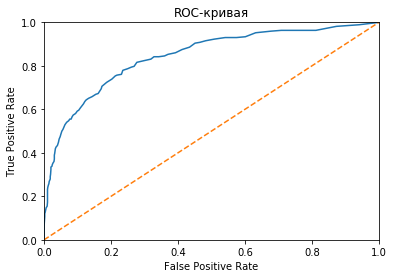

In [50]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

## Вывод

Выполнена подготовка данных для корректной работы моделей: заполнены пропущенные значения, удалены ненужные данные, осуществлено прямое кодирование категориальных признаков с учетом дамми-ловушки, данные разделены на выборки, отмасштаброваны признаки.  
Для исследования использовались модели Дерево решений, Случайный лес и Логистическая регрессия.  
Осуществлено изучение метрик качества данных моделей на несбалансированной и сбалансированной выборках. Наилучшее значение F1-меры, равное 0,63,  достигнуто на сбалансированной выборке у модели Случайный лес. Тестирование наилучшей модели показало приемлимое значение F1-меры, равное 0,6. По графику ROC-кривой модели видно, что она расположена значительно выше линии случайной модели, что говорит о большем количестве истинноположительных ответов, нежели у случайной модели и соответственно о более высоком качестве модели Случайного леса.